In [233]:
#This project will explore the Kiva Loan Dataset and visualize the types, locations, and life of the loans to get a better sense of the loan program as a whole. This project began as a capstone project from Codecademy, but I developed the project to focus on my own questions about the loan program. This focus included using scipy to perform a two sample t-test to better understand the differences in how men and women receive loans through the program. Ultimately, the visualizations led me to suspect a difference between how men and women receive money and statistical analysis confirmed that this difference was almost certainly not by chance but represented an actual difference in the program.

# First, we need to import the proper libraries and convert the csv file into a DataFrame.

import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats

kiva_df = pd.read_csv('kiva_data.csv')
kiva_df['num'] = 1
print(kiva_df.head())

# So this lets us get a sense of the information. We have an index, loan_amount in U.S. dollars, the activity which the loan will fund, the country the loan is to be used, and the gender of the loan recipient. 

   loan_amount               activity   country  gender  num
0          625  Food Production/Sales  Pakistan  female    1
1          250  Food Production/Sales  Pakistan  female    1
2          400  Food Production/Sales  Pakistan  female    1
3          400  Food Production/Sales  Pakistan  female    1
4          500  Food Production/Sales  Pakistan  female    1


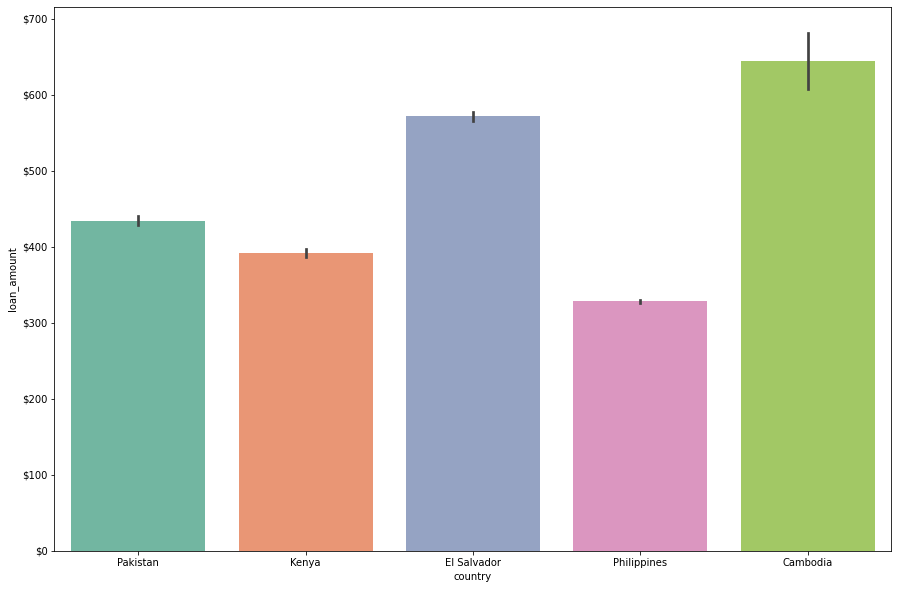

In [234]:
# We will start by getting a sense of the laon amounts based on country. We can use a Seaborn barplot which will automatically give the avg (mean) loan amount per country along with a sense of the standard deviation.
f, ax = plt.subplots(figsize=(15, 10))
#qual_palette = sns.color_palette('Set3', 10)
#sns.palplot(qual_palette)
ax = sns.barplot(data=kiva_df, x='country', y='loan_amount')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

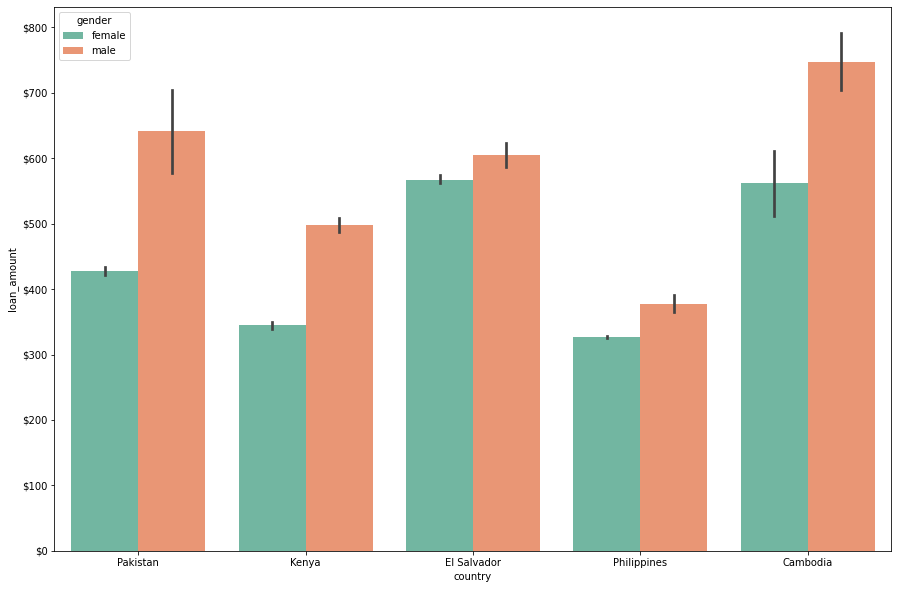

In [235]:
# After looking at the initial results from the graph of avg loan amount by country, I then wanted to compare the breakdown of the avg loan amount by country but also see the breakdown between gender (interesting to note that in many countries, not just in Africa but around the world, gender was not a binary category so even this categorization could be seen as not accurately reflecting the experiences of the people in each country). It is interesting to note that the avg loan amount is higher for men in every country. 

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=kiva_df, x='country', y='loan_amount', hue='gender')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

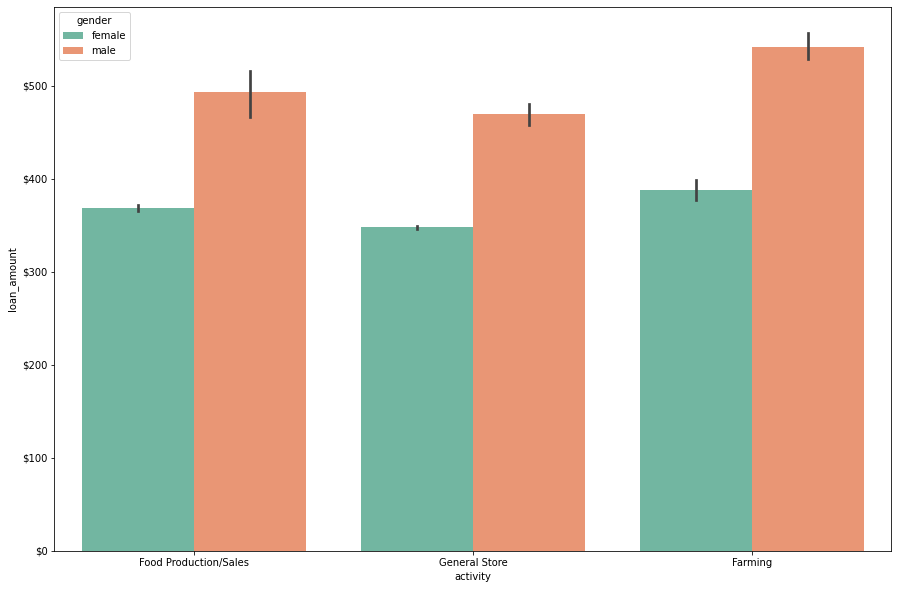

In [236]:
# I want to see if this trend is consistent across industries. To do this I graph avg loan amount across the three categories and also divide by gender. Again, men receive a higher loan amount in every category. 

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=kiva_df, x='activity', y='loan_amount', hue='gender')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

In [237]:
# I next want to look at the number of loans given. I'm wondering if the breakdown of who gets the loans follows a similiar pattern as we've seen with the loan amounts. I want to start with a graph that will give the number of loans per country and then show the breakdown by gender. To do this, I'm going to have create a new DataFrame that groups categories together.

by_country = kiva_df.groupby(['country', 'activity', 'gender']).size()
#print(type(by_country))
#print(by_country)
by_country_df = by_country.to_frame()
#print(type(by_country_df))
print(list(by_country_df.columns))
#by_country_df.rename(columns={'country': 'country', 'activity': 'activity', 'gender': 'gender', '': 'count'})
#print(by_country_df.head())
gender_df = kiva_df.groupby('gender').sum()
print(gender_df)

#gender_df_amount_total = gender_df['loan amount']
#print(gender_df_amount_total)

loam_amount_by_gender = [21767175, 1919050]


[0]
        loan_amount    num
gender                    
female     21767175  61632
male        1919050   3867


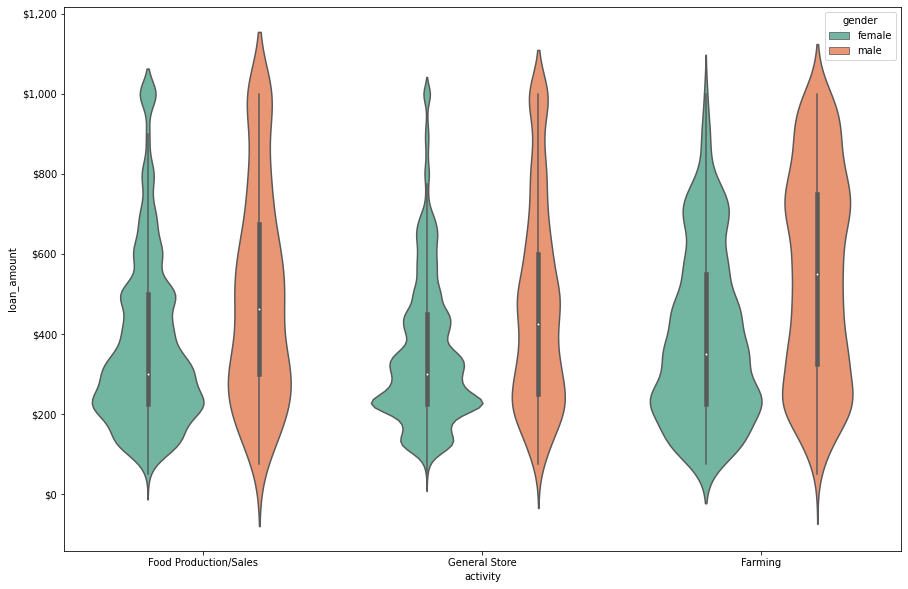

In [238]:
# So the by_country_df gives a sense of how the loans are broken down by country, activity, and gender. The boxplot wasn't working as well as it had for other visualitzations so I am going to use a violin and box plots to get a better sense of distribution and spread. Because of Seaborns functionality, I can go back to the original kiva_df and just specify the columns I want to use to group and plot. What's interesting about the restuls of this first violin plot is that while men and women can receive loans of similar amounts, for each activity, women's avg loan amount is about the mean and the median skews well below the mean whereas for men the distribution is more even. 

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.violinplot(data=kiva_df, x='activity', y='loan_amount', hue='gender')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

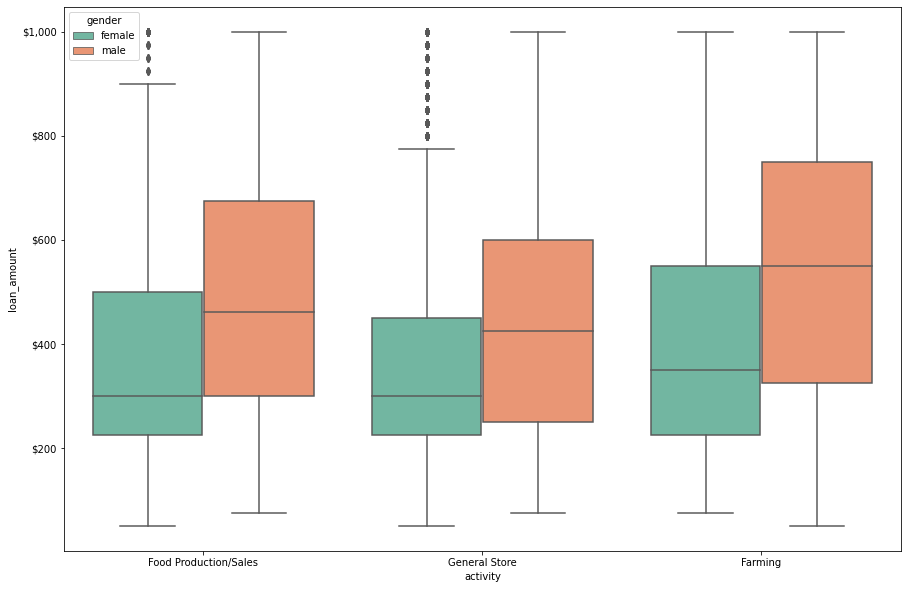

In [239]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_palette("Set2")
ax = sns.boxplot(data=kiva_df, x='activity', y='loan_amount', hue='gender')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

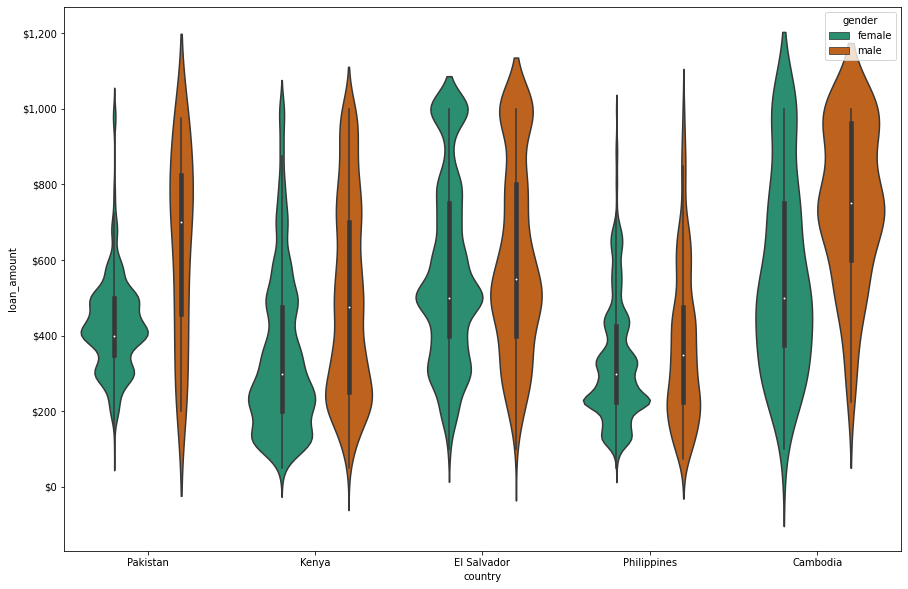

In [240]:
# Switching to look at the distribution by country we see a little more variation. While Pakistan, Kenya, and Cambodia all show similar distributsions to what we saw above with avg loan amount for women skewing low while there are more even distributions for men, Philipines and El Salvador show more parity between genders.

f, ax = plt.subplots(figsize=(15, 10))
sns.set_palette('Dark2')
ax = sns.violinplot(data=kiva_df, x='country', y='loan_amount', hue='gender')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

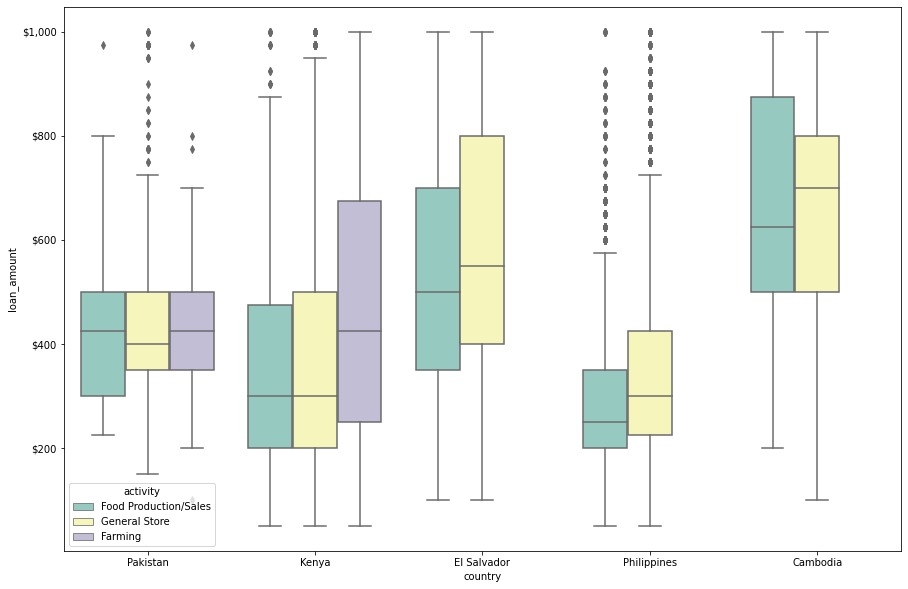

In [241]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_palette("Set3")
ax = sns.boxplot(data=kiva_df, x='country', y='loan_amount', hue='activity')
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

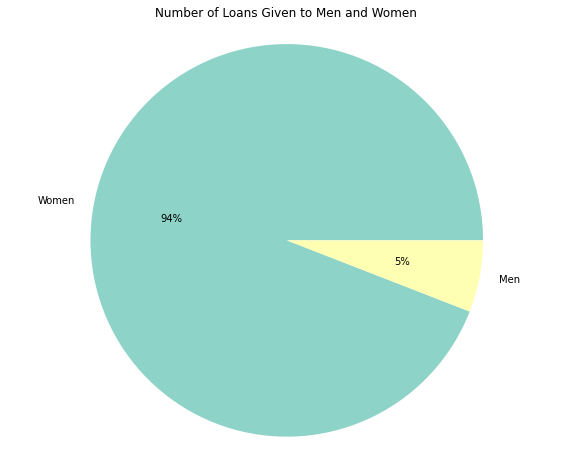

In [242]:
# My next question focuses on the amount of money given to men and women, respectively. I want to first get a sense for how the program breaks down in terms of the number of loans given to each group and the amount of money from the whole program that these loans represent. To do this, I will use two pie charts to visualize the data. What becomes apparent is that while men only receive 5% of the loans, those loans represent 8% of the total amount of money received. All things being equal, I would expect that the precentage breakdowns to be match. I want to know about that 3% difference.

plt.figure(figsize=(10,8))
plt.subplot()
plt.pie([61632, 3867], labels=['Women', 'Men'], autopct='%1d%%')
plt.axis('equal')
plt.title('Number of Loans Given to Men and Women')
plt.show()

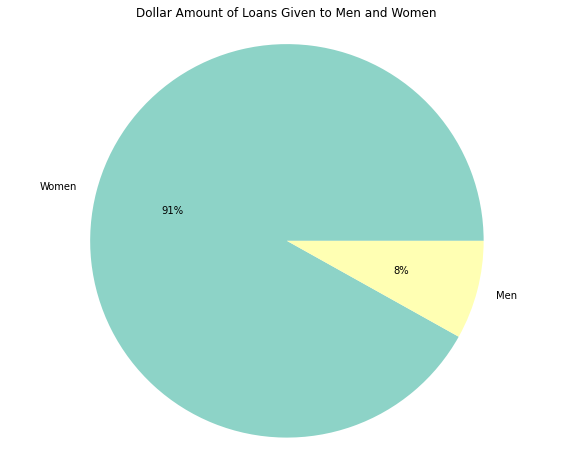

<Figure size 432x288 with 0 Axes>

In [243]:
plt.figure(figsize=(10,8))
plt.subplot()
plt.pie(loam_amount_by_gender, labels=['Women', 'Men'], autopct='%1d%%')
plt.axis('equal')
plt.title('Dollar Amount of Loans Given to Men and Women')
plt.show()

plt.clf()


In [244]:
# I want to see if there is a statistically signifiacnt difference between the way loans are given to men and women. To do this, I will need a null hypothesis (Ho). This hypothesis is that there is not statistically significant difference and so both groups essentially come from the same general population (i.e., people are treated equally it's just that in these particular samples the means of the loans came out to be different). In order to assess the validity of Ho, I will need to render a p-value that compares the two datasets. 

#The first step is to create my two data sets. The first will be a all the loan amounts given to men and the second will be all the loan amounts given to women.

kiva_men = kiva_df.loc[kiva_df['gender'] == 'male']
print(kiva_men)
kiva_men_loan_series = kiva_men.loan_amount
print(kiva_men_loan_series)

kiva_women = kiva_df.loc[kiva_df['gender'] == 'female']
print(kiva_women)
kiva_women_loan_series = kiva_women.loan_amount
print(kiva_women_loan_series)

print(type(kiva_women_loan_series))



       loan_amount               activity   country gender  num
27             800  Food Production/Sales  Pakistan   male    1
89             700  Food Production/Sales     Kenya   male    1
105            250  Food Production/Sales     Kenya   male    1
154            250  Food Production/Sales     Kenya   male    1
160            250  Food Production/Sales     Kenya   male    1
...            ...                    ...       ...    ...  ...
65491          675                Farming     Kenya   male    1
65492          950                Farming     Kenya   male    1
65493          350                Farming     Kenya   male    1
65494          875                Farming     Kenya   male    1
65496          825                Farming     Kenya   male    1

[3867 rows x 5 columns]
27       800
89       700
105      250
154      250
160      250
        ... 
65491    675
65492    950
65493    350
65494    875
65496    825
Name: loan_amount, Length: 3867, dtype: int64
       loan_amount

In [245]:
#This two sample t-test will help determine if both sameples come from the same population. A pvalue of less than .05 would render my Ho unlikely, but not impossible, and lead us to our alternative hypotheis that the difference between the mean loan amounts is statistically significant. The pvalue of 0.0 (actually <.001) shows it is highly unlikely that Ho is valid. 

res = stats.ttest_ind(kiva_women_loan_series, kiva_men_loan_series)
print(res)


Ttest_indResult(statistic=-44.986323821396844, pvalue=0.0)


In [246]:
#This is just another way to isolate the data. Making sure it came out the same.

male = kiva_df.query('gender == "male"')['loan_amount']
print(male)
print(type(male))


27       800
89       700
105      250
154      250
160      250
        ... 
65491    675
65492    950
65493    350
65494    875
65496    825
Name: loan_amount, Length: 3867, dtype: int64
<class 'pandas.core.series.Series'>


In [247]:
#Just to be sure, however, that it's not an issue with my data, I'm going to repeat the test with the data as a list rather than a series. It shouldn't make a difference, but a pvalue that low either means a highly signifacant difference between datasets or an error. This is to check whether it is an error.
 
kiva_men_loan_list = list(kiva_men_loan_series)
#print(kiva_men_loan_list)

kiva_women_loan_list = list(kiva_women_loan_series)
print(type(kiva_women_loan_list))

<class 'list'>


In [248]:
# Running the test with my data as a list rather than a series gives the same t and p values. The result points to there being a statistically significant difference and, therefore, the likelihood that Ho is incorrect. This would mean that the samples (loans given to men and loans given to women) do not come from the same general population but women and men are treated as different populations in terms of the loans under examination.  

res2 = stats.ttest_ind(kiva_women_loan_list, kiva_men_loan_list)
print(res2)

Ttest_indResult(statistic=-44.986323821396844, pvalue=0.0)
